This notebook is a primer on the `pandas` python package.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string

# Loading Data

Pandas DataFrames wrap n by m matricies and give the rows and columns names

In [2]:
shape = 5, 2
data = np.random.normal(size=shape)
data

array([[ 1.42762066,  0.32021434],
       [ 1.24068247, -0.02979016],
       [-1.08076537,  1.14271441],
       [-0.91608445,  0.32465844],
       [-0.7572041 ,  0.57001211]])

In [3]:
df1 = pd.DataFrame(data)
df1

,0,1
0,1.427621,0.320214
1,1.240682,-0.029790
2,-1.080765,1.142714
3,-0.916084,0.324658
4,-0.757204,0.570012


The first argument of `pd.DataFrame` is the array of data, then other arguments must be given by keywords. DataFrames are handled by Jupyter Notebook and displated with nice HTML tables.

In [4]:
n_row, n_col = data.shape
index = ('Row {}'.format(i + 1) for i in range(n_row))
columns = (string.ascii_uppercase[i] for i in range(n_col))

df1 = pd.DataFrame(data, columns=columns, index=index)
df1

,A,B
Row 1,1.427621,0.320214
Row 2,1.240682,-0.029790
Row 3,-1.080765,1.142714
Row 4,-0.916084,0.324658
Row 5,-0.757204,0.570012


Data can also be loaded as key-value dictionaries where the keys are the columns and the values are arrays of the same lengths.

`df.head()` is used to show the first couple rows

In [5]:
n_rows = 700
a_data = np.random.normal(size=n_rows)
b_data = np.random.exponential(size=n_rows)
c_data = np.random.normal(size=n_rows, scale=0.4) + b_data

data_dict = {
    'A': a_data,
    'B': b_data,
    'C': c_data
}

df2 = pd.DataFrame(data_dict)
df2.head()

,A,B,C
0,1.924308,0.587634,1.030674
1,-0.367491,0.905730,0.856806
2,0.755114,2.685315,2.855100
3,-0.446229,0.652486,0.920460
4,-0.098542,0.041206,0.273549


# Summarizing Data

Some statistics can be taken quickly on a dataframe with `DataFrame.describe`

In [6]:
df2.describe()

,A,B,C
count,700.000000,700.000000,700.000000
mean,-0.142119,1.013424,1.034638
std,0.998623,0.970803,1.035636
min,-2.988590,0.001064,-0.942273
25%,-0.812968,0.303998,0.352326
50%,-0.095954,0.765065,0.839153
75%,0.561150,1.396272,1.446239
max,2.530053,7.451031,6.612465


The distributions of each column can be quickly plotted with `matplotlib` using `DataFrame.hist`

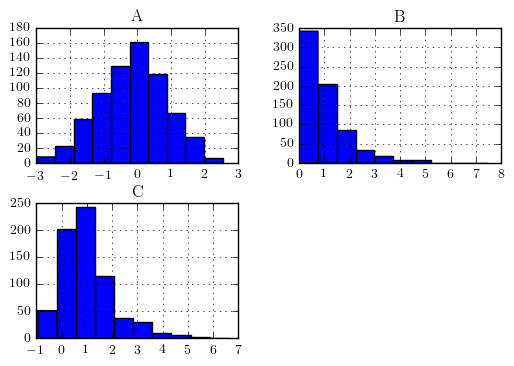

In [7]:
df2.hist()
plt.show()

The pairwise distributions of each feature can be explored with `pd.tools.plotting.scatter_matrix`. This plot uncovers the relationship between columns B and C, mainly that column C was prepared by adding gaussian noise to column B.

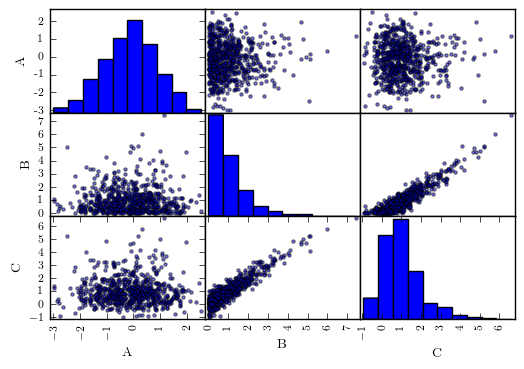

In [8]:
pd.tools.plotting.scatter_matrix(df2)
plt.show()

# Accessing Data

In [9]:
df1['A']

Row 1    1.427621
Row 2    1.240682
Row 3   -1.080765
Row 4   -0.916084
Row 5   -0.757204
Name: A, dtype: float64

In [10]:
condition = df1['A'] > 0.6
condition

Row 1     True
Row 2     True
Row 3    False
Row 4    False
Row 5    False
Name: A, dtype: bool

In [11]:
df1.loc[condition]

,A,B
Row 1,1.427621,0.320214
Row 2,1.240682,-0.029790


In [12]:
df1.loc[condition, 'A']

Row 1    1.427621
Row 2    1.240682
Name: A, dtype: float64

In [13]:
df1.loc[condition, ['A', 'B']]

,A,B
Row 1,1.427621,0.320214
Row 2,1.240682,-0.029790


In [14]:
df1.iloc[0]

A    1.427621
B    0.320214
Name: Row 1, dtype: float64

In [15]:
df1.iloc[[0, 1]]

,A,B
Row 1,1.427621,0.320214
Row 2,1.240682,-0.029790


In [16]:
df1.iloc[range(2)]

,A,B
Row 1,1.427621,0.320214
Row 2,1.240682,-0.029790


# Analyzing Data

In [21]:
condition = df2['A'] > 2
condition.head()

0    False
1    False
2    False
3    False
4    False
Name: A, dtype: bool

In [22]:
condition.sum()

6

In [37]:
sliced = df2.loc[condition, 'B']

sliced.mean(), sliced.std(), sliced.min(), sliced.max()

(0.809119581003785,
 0.4316922982547915,
 0.15194349141350916,
 1.3961292942484822)

In [38]:
sliced.quantile([0.01, 0.05, 0.95, 0.99])

0.01    0.169447
0.05    0.239459
0.95    1.302545
0.99    1.377412
Name: B, dtype: float64

In [35]:
sliced.describe()

count    6.000000
mean     0.809120
std      0.431692
min      0.151943
25%      0.591005
50%      0.891425
75%      0.997553
max      1.396129
Name: B, dtype: float64